In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [3]:
import matplotlib
matplotlib.rcParams.update({
    "font.family": "sans-serif",             # use serif rather than sans-serif
    "font.serif": "Deja-Vu",    # use "Times New Roman" as the standard font

})

In [4]:
output_df = tsvar.plotting.load_outputs(exp_dir="../output/dataRegimes-n10-2/")
cols = [col for col in output_df.columns if col.startswith('mle')]

Process file: ../output/dataRegimes-n10-2/1590694516-g04-d10-n020000/output-03.json...


In [5]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df['Id'] = output_df.apply(build_Id, axis=1)

print(output_df.shape)
output_df.head()

(200, 39)


,mle_baseline,mle_beta,mle_adjacency,mle_conv,mle_history,mle_num_iter,bbvi_loc,bbvi_log_scale,bbvi_coeffs_mean,bbvi_coeffs_mode,...,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed,Id
0,"[0.07302222731504364, 0.07574182906571225, 0.5...","[[2.211221535119643, 2.1587185952395034, 1.366...","[[1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",1700,"[-1.8910086154937744, -1.3716388940811157, -2....","[-1.7918965816497803, -2.2025673389434814, -1....","[0.1530296577668597, 0.2552449355072055, 0.088...","[0.14678611129873695, 0.2506109968581736, 0.08...",...,output-00.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-00.json
1,"[0.5145425079849086, 0.5107136552256204, 0.512...","[[1.4130525509934466, 1.5885541222803308, 1.70...","[[1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",1100,"[-2.7304489612579346, -1.4684937000274658, -2....","[-1.2899280786514282, -2.06308650970459, -1.73...","[0.06770762277062128, 0.23213842466147533, 0.1...","[0.06043215998850481, 0.2265842937085948, 0.10...",...,output-01.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-01.json
2,"[0.514567932543949, 0.5152714143600883, 0.5177...","[[50.56358061607632, 1.8308281886755517, 34.61...","[[0.5145840852451645, 1e-10, 0.517723426016006...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2400,"[-2.7092483043670654, -2.4195072650909424, -2....","[-1.5230780839920044, -1.4414854049682617, -1....","[0.06818861611912462, 0.09149022501956197, 0.0...","[0.06349528557063025, 0.0841229794539788, 0.08...",...,output-02.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-02.json
3,"[0.09263000580779752, 0.5145351768247899, 0.51...","[[2.9525558138339676, 2.2052653219304537, 1.59...","[[1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 0....",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2000,"[-2.010283946990967, -1.5263357162475586, -2.4...","[-1.6783628463745117, -2.091539144515991, -1.5...","[0.13630512264795808, 0.2189942132843795, 0.08...","[0.12936296722438329, 0.21404110499373397, 0.0...",...,output-03.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-03.json
4,"[0.5153948620596939, 0.1113193505001733, 0.511...","[[1.865082851816161, 1e-10, 40.047113501619855...","[[1e-10, 0.04203069024254374, 0.51186911344416...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",1900,"[-1.8268916606903076, -1.617118239402771, -1.7...","[-1.9387288093566895, -1.7751957178115845, -1....","[0.16258733692922053, 0.20133974173767596, 0.1...","[0.15761576813573444, 0.19285211305316996, 0.1...",...,output-00.json,10,"[0.0283, 0.0132, 0.0472, 0.0484, 0.0471, 0.031...","[[0.8116, 0.165, 0.5225, 0.412, 0.9752, 0.3192...","[[0.0, 0.1667, 0.1796, 0.1097, 0.1372, 0.0, 0....",10,499,"[857735694, 1018385563, 1295093419, 656948719]",564435282,1590694496-g01-d10-n000499/output-00.json


---

In [55]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'bbvi_mean': 'bbvi_adj_mean', 
    'bbvi_mode': 'bbvi_adj_mode',
    'vi_mean': 'vi_adj_mean',
    'vi_mode': 'vi_adj_mode',
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='max_jumps', threshold=0.05)
plot_df

acc_mle                               acc_bbvi_mean                \
              min   max    mean       std count           min   max    mean   
max_jumps                                                                     
499          0.43  0.68  0.5615  0.062008    20          0.52  0.71  0.6135   
753          0.50  0.66  0.5785  0.048804    20          0.47  0.73  0.6120   
1134         0.52  0.71  0.6105  0.049255    20          0.63  0.82  0.7145   
1709         0.50  0.72  0.6030  0.056391    20          0.65  0.81  0.7115   
2576         0.51  0.86  0.6050  0.079703    20          0.57  0.86  0.7295   
3881         0.55  0.76  0.6345  0.056613    20          0.80  0.94  0.8775   
5848         0.51  0.93  0.6415  0.110419    20          0.79  0.97  0.9060   
8810         0.49  0.95  0.6580  0.146273    20          0.89  0.98  0.9305   
13274        0.50  0.97  0.6940  0.150102    20          0.88  1.00  0.9545   
20000        0.50  0.96  0.6875  0.160718    20          0.93  1.00  0.9685   

                           ... fn_vi_mode                            fn_gb  \
                std count  ...        min max   mean       std count   min   
max_jumps                  ...                                               
499        0.058784    20  ...         22  39  31.20  5.434781    20    23   
753        0.075853    20  ...         14  44  28.15  7.227688    20    21   
1134       0.051450    20  ...         11  25  18.85  3.422449    20    22   
1709       0.043198    20  ...          9  21  16.10  2.751076    20    23   
2576       0.077831    20  ...          5  25  14.40  5.490662    20    23   
3881       0.045523    20  ...          2  14   6.05  2.892367    20    11   
5848       0.053449    20  ...          1  11   4.60  3.168928    20    14   
8810       0.023278    20  ...          0   8   3.65  2.084403    20    14   
13274      0.027237    20  ...          0   5   2.05  1.571958    20    10   
20000      0.022542    20  ...          0   4   1.20  1.399248    20    10   

                                      
          max   mean       std count  
max_jumps                             
499        37  30.25  4.216197    20  
753        40  30.85  5.304169    20  
1134       33  27.05  3.086047    20  
1709       37  27.85  3.166851    20  
2576       37  28.85  3.468277    20  
3881       28  20.75  4.929770    20  
5848       30  21.35  3.869925    20  
8810       25  19.60  2.980639    20  
13274      26  17.80  4.098780    20  
20000      21  15.95  3.051747    20  

[10 rows x 240 columns]

In [56]:
def get_runtime(row, start_idx=0, unit='sec', scale='lin'):
    if unit == 'sec':
        factor = 1
    elif unit == 'min':
        factor = 1 / 60
    elif unit == 'hour':
        factor = 1 / 3600
    else:
        raise ValueError('Unknown unit')
    times = row['time'][start_idx:]
    if len(times) > 0:
        last_iter = row['iter'][-1]
        val = np.mean(times) * last_iter * factor
        if scale == 'log':
            val = np.log10(val)
        return val
    else:
        return np.nan

unit = 'min'

rt_df = pd.DataFrame(index=output_df.index)
rt_df['max_jumps'] = output_df['max_jumps']
rt_df['runtime_mle'] = output_df['mle_history'].apply(get_runtime, start_idx=0, unit=unit, scale='log')
rt_df['runtime_bbvi_mean'] = output_df['bbvi_history'].apply(get_runtime, start_idx=0, unit=unit, scale='log')

rt_df['runtime_vi_mean'] = output_df['vi_history'].apply(get_runtime, start_idx=1, unit=unit, scale='log')
rt_df['runtime_vi_mode'] = output_df['vi_history'].apply(get_runtime, start_idx=1, unit=unit, scale='log')

#rt_df['runtime_vi_fixed_beta_mean'] = output_df['vi_fixed_beta_history'].apply(get_runtime, start_idx=10, unit=unit)

rt_df['runtime_gb'] = output_df['gb_history'].apply(get_runtime, start_idx=0, unit=unit, scale='log')

rt_df = rt_df.groupby('max_jumps', ).agg(['mean', 'std'])

plot_df = plot_df.join(rt_df)
plot_df

acc_mle                               acc_bbvi_mean                \
              min   max    mean       std count           min   max    mean   
max_jumps                                                                     
499          0.43  0.68  0.5615  0.062008    20          0.52  0.71  0.6135   
753          0.50  0.66  0.5785  0.048804    20          0.47  0.73  0.6120   
1134         0.52  0.71  0.6105  0.049255    20          0.63  0.82  0.7145   
1709         0.50  0.72  0.6030  0.056391    20          0.65  0.81  0.7115   
2576         0.51  0.86  0.6050  0.079703    20          0.57  0.86  0.7295   
3881         0.55  0.76  0.6345  0.056613    20          0.80  0.94  0.8775   
5848         0.51  0.93  0.6415  0.110419    20          0.79  0.97  0.9060   
8810         0.49  0.95  0.6580  0.146273    20          0.89  0.98  0.9305   
13274        0.50  0.97  0.6940  0.150102    20          0.88  1.00  0.9545   
20000        0.50  0.96  0.6875  0.160718    20          0.93  1.00  0.9685   

                           ... runtime_mle           runtime_bbvi_mean  \
                std count  ...        mean       std              mean   
max_jumps                  ...                                           
499        0.058784    20  ...   -0.701093  0.103234          0.476914   
753        0.075853    20  ...   -0.521418  0.267419          0.484439   
1134       0.051450    20  ...   -0.564639  0.214337          0.481541   
1709       0.043198    20  ...   -0.454298  0.370154          0.485526   
2576       0.077831    20  ...   -0.258538  0.332367          0.534200   
3881       0.045523    20  ...   -0.395477  0.321739          0.554779   
5848       0.053449    20  ...   -0.243521  0.424924          0.573948   
8810       0.023278    20  ...   -0.218681  0.481099          0.661978   
13274      0.027237    20  ...   -0.039608  0.443780          0.708307   
20000      0.022542    20  ...    0.060875  0.457670          0.740659   

                    runtime_vi_mean           runtime_vi_mode            \
                std            mean       std            mean       std   
max_jumps                                                                 
499        0.029667       -1.709852  0.079761       -1.709852  0.079761   
753        0.019131       -1.665723  0.102790       -1.665723  0.102790   
1134       0.032687       -1.705920  0.073336       -1.705920  0.073336   
1709       0.033095       -1.695899  0.088379       -1.695899  0.088379   
2576       0.015317       -1.605567  0.080352       -1.605567  0.080352   
3881       0.012567       -1.569072  0.059953       -1.569072  0.059953   
5848       0.036859       -1.493493  0.052461       -1.493493  0.052461   
8810       0.015771       -1.345869  0.037008       -1.345869  0.037008   
13274      0.026327       -1.219916  0.038074       -1.219916  0.038074   
20000      0.021925       -1.057919  0.027362       -1.057919  0.027362   

          runtime_gb            
                mean       std  
max_jumps                       
499        -2.290529  0.054501  
753        -2.127025  0.049705  
1134       -1.969435  0.060717  
1709       -1.826194  0.017163  
2576       -1.643970  0.038567  
3881       -1.478055  0.022991  
5848       -1.313803  0.025972  
8810       -1.113320  0.033994  
13274      -0.943495  0.027795  
20000      -0.790573  0.026541  

[10 rows x 250 columns]

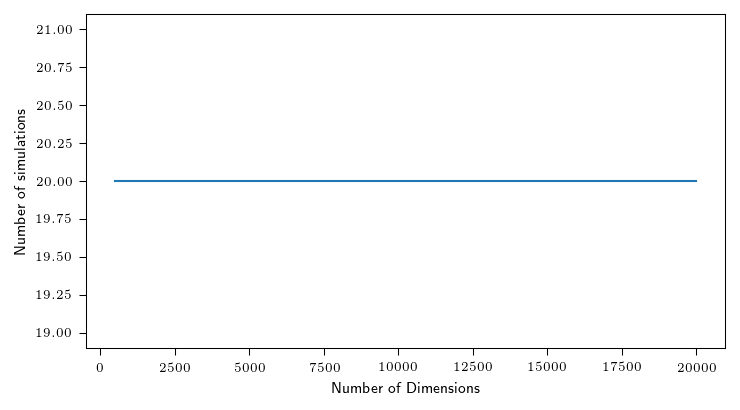

In [18]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

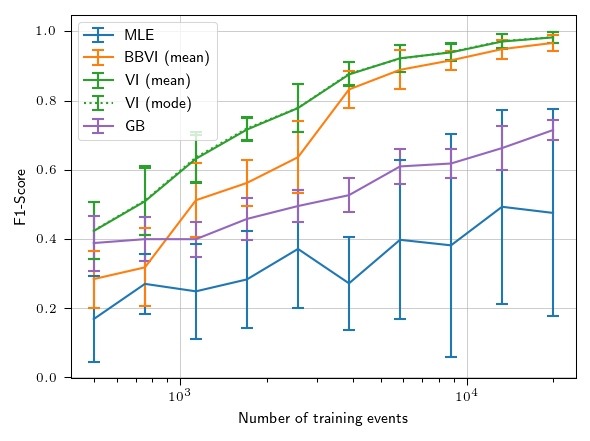

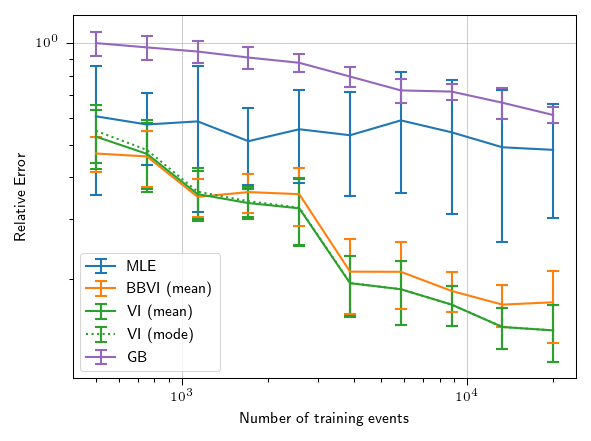

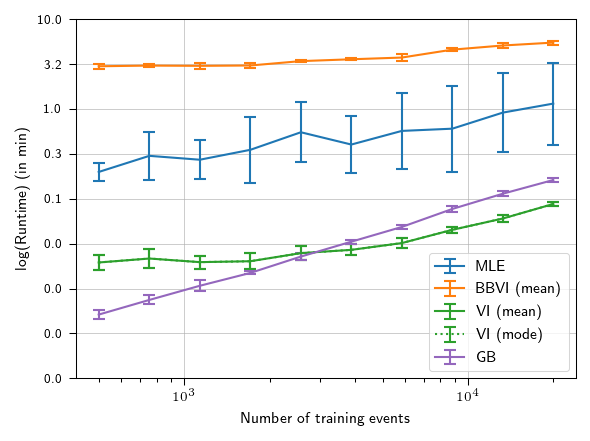

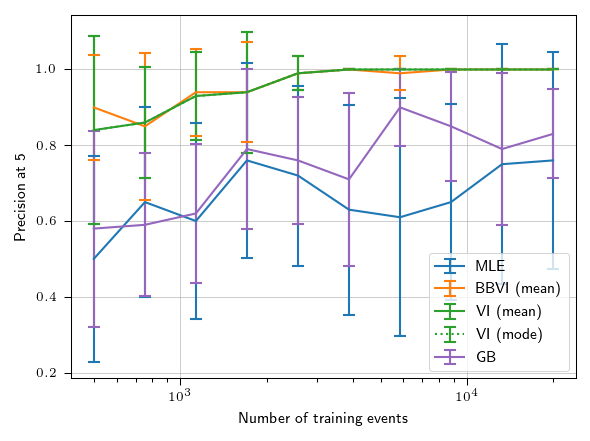

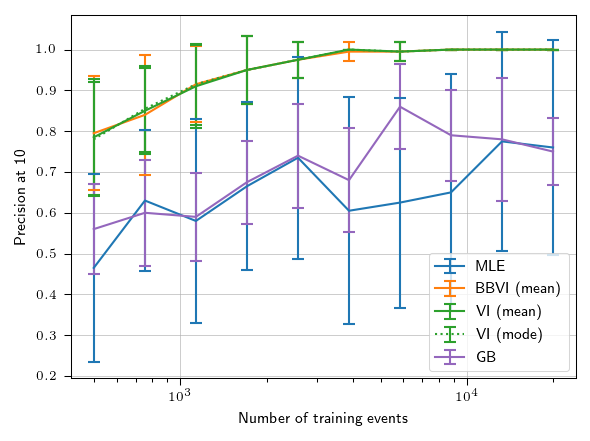

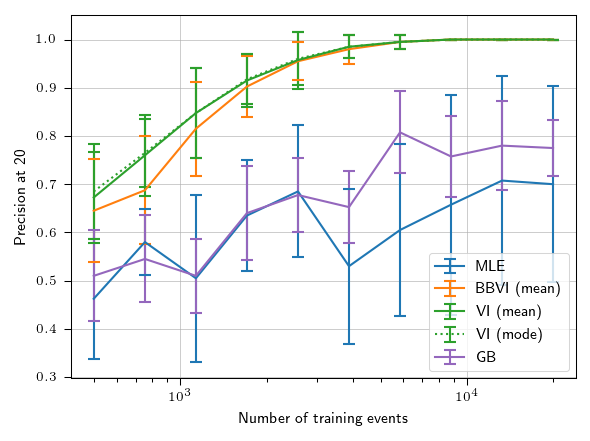

In [75]:
plot_meta_data = [
#    ('acc', 'Accuracy'),
    ('f1score', 'F1-Score'), 
    ('relerr', 'Relative Error'),
    ('runtime', f'log(Runtime) (in {unit})'),
    ('precAt5', 'Precision at 5'),
    ('precAt10', 'Precision at 10'),
    ('precAt20','Precision at 20')
]

queries_list = [
    ('mle',                'MLE',          'C0', '-'), 
    ('bbvi_mean',          'BBVI (mean)',  'C1', '-'), 
    #('bbvi_mode',          'BBVI (mode)',  'C1', ':'),
    ('vi_mean',            'VI (mean)',    'C2', '-'),
    ('vi_mode',            'VI (mode)',    'C2', ':'),
    #('vi_fixed_beta_mean', 'VI-fb (mean)', 'C3', '-'),
    #('vi_fixed_beta_mode', 'VI-fb (mode)', 'C3', ':'),
    ('gb',                 'GB',           'C4', '-'),
]

for prefix, ylabel in plot_meta_data:

    plt.figure(figsize=(3.95, 2.95))
    plt.grid()
    for suf, label, color, ls in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls)
    plt.legend()
    plt.xlabel('Number of training events')
    plt.xscale('log')
    plt.ylabel(ylabel);
    
    if prefix == 'relerr':
        plt.yscale('log', basey=10.0)
        pass
        
    if prefix == 'runtime':
        #locs, labels = plt.yticks()
        locs = np.log10(np.arange(0.))
        plt.yticks(locs, np.round(10 ** locs, 1))
        #plt.yscale('log')
        pass
    
    plt.tight_layout()
    #plt.savefig(f'/root/figures/fig-{prefix}.pdf')

In [83]:
10 ** locs

array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01])

In [87]:
np.logspace(-3, 1, 43, base=10)

array([1.00000000e-03, 1.24519708e-03, 1.55051578e-03, 1.93069773e-03,
       2.40409918e-03, 2.99357729e-03, 3.72759372e-03, 4.64158883e-03,
       5.77969288e-03, 7.19685673e-03, 8.96150502e-03, 1.11588399e-02,
       1.38949549e-02, 1.73019574e-02, 2.15443469e-02, 2.68269580e-02,
       3.34048498e-02, 4.15956216e-02, 5.17947468e-02, 6.44946677e-02,
       8.03085722e-02, 1.00000000e-01, 1.24519708e-01, 1.55051578e-01,
       1.93069773e-01, 2.40409918e-01, 2.99357729e-01, 3.72759372e-01,
       4.64158883e-01, 5.77969288e-01, 7.19685673e-01, 8.96150502e-01,
       1.11588399e+00, 1.38949549e+00, 1.73019574e+00, 2.15443469e+00,
       2.68269580e+00, 3.34048498e+00, 4.15956216e+00, 5.17947468e+00,
       6.44946677e+00, 8.03085722e+00, 1.00000000e+01])